In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv("uc_club.csv")

In [4]:
df.describe()

,ceeb_id,app_val,adm_val,enr_val,app_gpa,adm_gpa,enr_gpa,col_lat,col_long,col_rank,sch_lat,sch_long,d
count,353564.000000,353564.000000,353564.000000,353564.000000,27.000000,18.000000,2.000,353564.000000,353564.000000,353564.000000,353564.000000,353564.000000,353564.000000
mean,67488.095553,18.251524,8.196737,1.817230,3.708720,3.905760,4.018,35.326695,-119.603330,4.308895,35.327168,-114.311850,592.942023
std,107892.649441,25.457394,13.715748,5.651741,0.149833,0.178037,0.000,2.034956,1.965374,2.376731,3.390631,31.487612,1632.804052
min,470.000000,5.000000,0.000000,0.000000,3.421429,3.428889,4.018,32.880100,-122.258500,1.000000,-36.922354,-159.358553,0.786120
25%,50628.000000,7.000000,0.000000,0.000000,3.600911,3.799854,4.018,33.640500,-121.761700,2.000000,33.884077,-121.764424,85.592036
50%,51955.000000,10.000000,5.000000,0.000000,3.708800,3.945000,4.018,34.414000,-119.848900,4.000000,34.189833,-118.401314,197.345356
75%,53095.000000,19.000000,9.000000,3.000000,3.824063,3.998000,4.018,37.871900,-117.844300,6.000000,37.582250,-117.817340,556.500820
max,999126.000000,754.000000,421.000000,314.000000,3.976667,4.150000,4.018,38.538200,-117.234000,9.000000,61.199736,174.697637,16952.302440


In [5]:
df.head()

,ceeb_id,fullname,campus,city.x,fall_term,school_name,ethcat,app_val,adm_val,enr_val,app_gpa,adm_gpa,enr_gpa,col_lat,col_long,col_rank,sch_lat,sch_long,d
0,470,NATIONAL UNIVERSITY470,San Diego,La Jolla,9/1/2013,NATIONAL UNIVERSITY,White,6,0,0,NaN,NaN,NaN,32.8801,-117.2340,3,32.829481,-117.127251,11.464280
1,933,COASTLINE COMMUNITY COLLEGE933,Berkeley,Fountain Valley,9/1/2015,COASTLINE COMMUNITY COLLEGE,Asian,10,0,0,NaN,NaN,NaN,37.8719,-122.2585,1,33.715600,-117.929238,605.606830
2,933,COASTLINE COMMUNITY COLLEGE933,Los Angeles,Fountain Valley,9/1/2015,COASTLINE COMMUNITY COLLEGE,White,7,0,0,NaN,NaN,NaN,34.0689,-118.4452,2,33.715600,-117.929238,61.811813
3,933,COASTLINE COMMUNITY COLLEGE933,Santa Barbara,Fountain Valley,9/1/2015,COASTLINE COMMUNITY COLLEGE,Asian,12,6,0,NaN,NaN,NaN,34.4140,-119.8489,5,33.715600,-117.929238,193.361754
4,933,COASTLINE COMMUNITY COLLEGE933,Riverside,Fountain Valley,9/1/2016,COASTLINE COMMUNITY COLLEGE,Asian,15,4,0,NaN,NaN,NaN,33.9737,-117.3281,8,33.715600,-117.929238,62.572713


In [6]:
df.ethcat.unique()
df.ethcat = df.ethcat.map({"White":0,"Asian":1,"Hispanic/ Latino":2,"African American":3,"Inter- national":4,"American Indian":5})

In [7]:
len(df.campus.unique())
df.campus = df.campus.map({"San Diego":0,"Berkeley":1,"Los Angeles":2,"Santa Barbara":3,"Riverside":4,"Irvine":5,"Davis":6,"Santa Cruz":7,"Merced":8})

In [8]:
len(df.campus.unique())

9

In [9]:
len(df["city.x"].unique())

1295

In [10]:
len(df.school_name.unique())

3265

In [11]:
df.app_val.unique()

array([  6,  10,   7,  12,  15,  16,   5,  17,  23,   9,  11,  19,  13,
        14,  18,  25,   8,  22,  33,  38,  24,  41,  48,  20,  36,  32,
        45,  30,  37,  51,  49,  50,  35,  27,  21,  42,  47,  31,  34,
        26,  43,  29,  52,  69,  68,  44,  39,  28,  64,  60,  53,  80,
       103,  75,  40,  66,  57, 150, 205, 110,  94, 278,  99, 194, 139,
        82, 102,  61, 287,  67,  78,  93, 107, 152, 181,  59, 126,  55,
       105,  86, 131,  88,  58, 145,  72, 104, 135, 160, 144,  54, 128,
       173, 136,  70,  97, 112, 273,  46, 113, 121,  91, 106,  65,  71,
       234, 167,  83, 117, 212,  62,  95,  74,  73, 183,  77, 132, 185,
       129, 123,  96,  90, 137, 120, 159,  89,  56,  63, 230, 213, 116,
       118, 163, 140, 154,  84, 187, 196, 119, 115, 114, 151, 141,  92,
        85, 162, 133, 165,  81, 169, 182, 210, 164, 270,  87, 168,  79,
       153, 149, 109, 124, 172, 127, 155, 186, 101, 111, 221, 184, 203,
       251, 282,  76, 146, 245, 206, 125, 178, 108, 122, 236,  9

In [12]:
df.drop(['ceeb_id', 'fullname', 'city.x', 'fall_term', 'school_name', 'app_gpa', 'adm_gpa','enr_gpa'], axis=1, inplace=True)

In [13]:
df.head()

,campus,ethcat,app_val,adm_val,enr_val,col_lat,col_long,col_rank,sch_lat,sch_long,d
0,0,0,6,0,0,32.8801,-117.2340,3,32.829481,-117.127251,11.464280
1,1,1,10,0,0,37.8719,-122.2585,1,33.715600,-117.929238,605.606830
2,2,0,7,0,0,34.0689,-118.4452,2,33.715600,-117.929238,61.811813
3,3,1,12,6,0,34.4140,-119.8489,5,33.715600,-117.929238,193.361754
4,4,1,15,4,0,33.9737,-117.3281,8,33.715600,-117.929238,62.572713


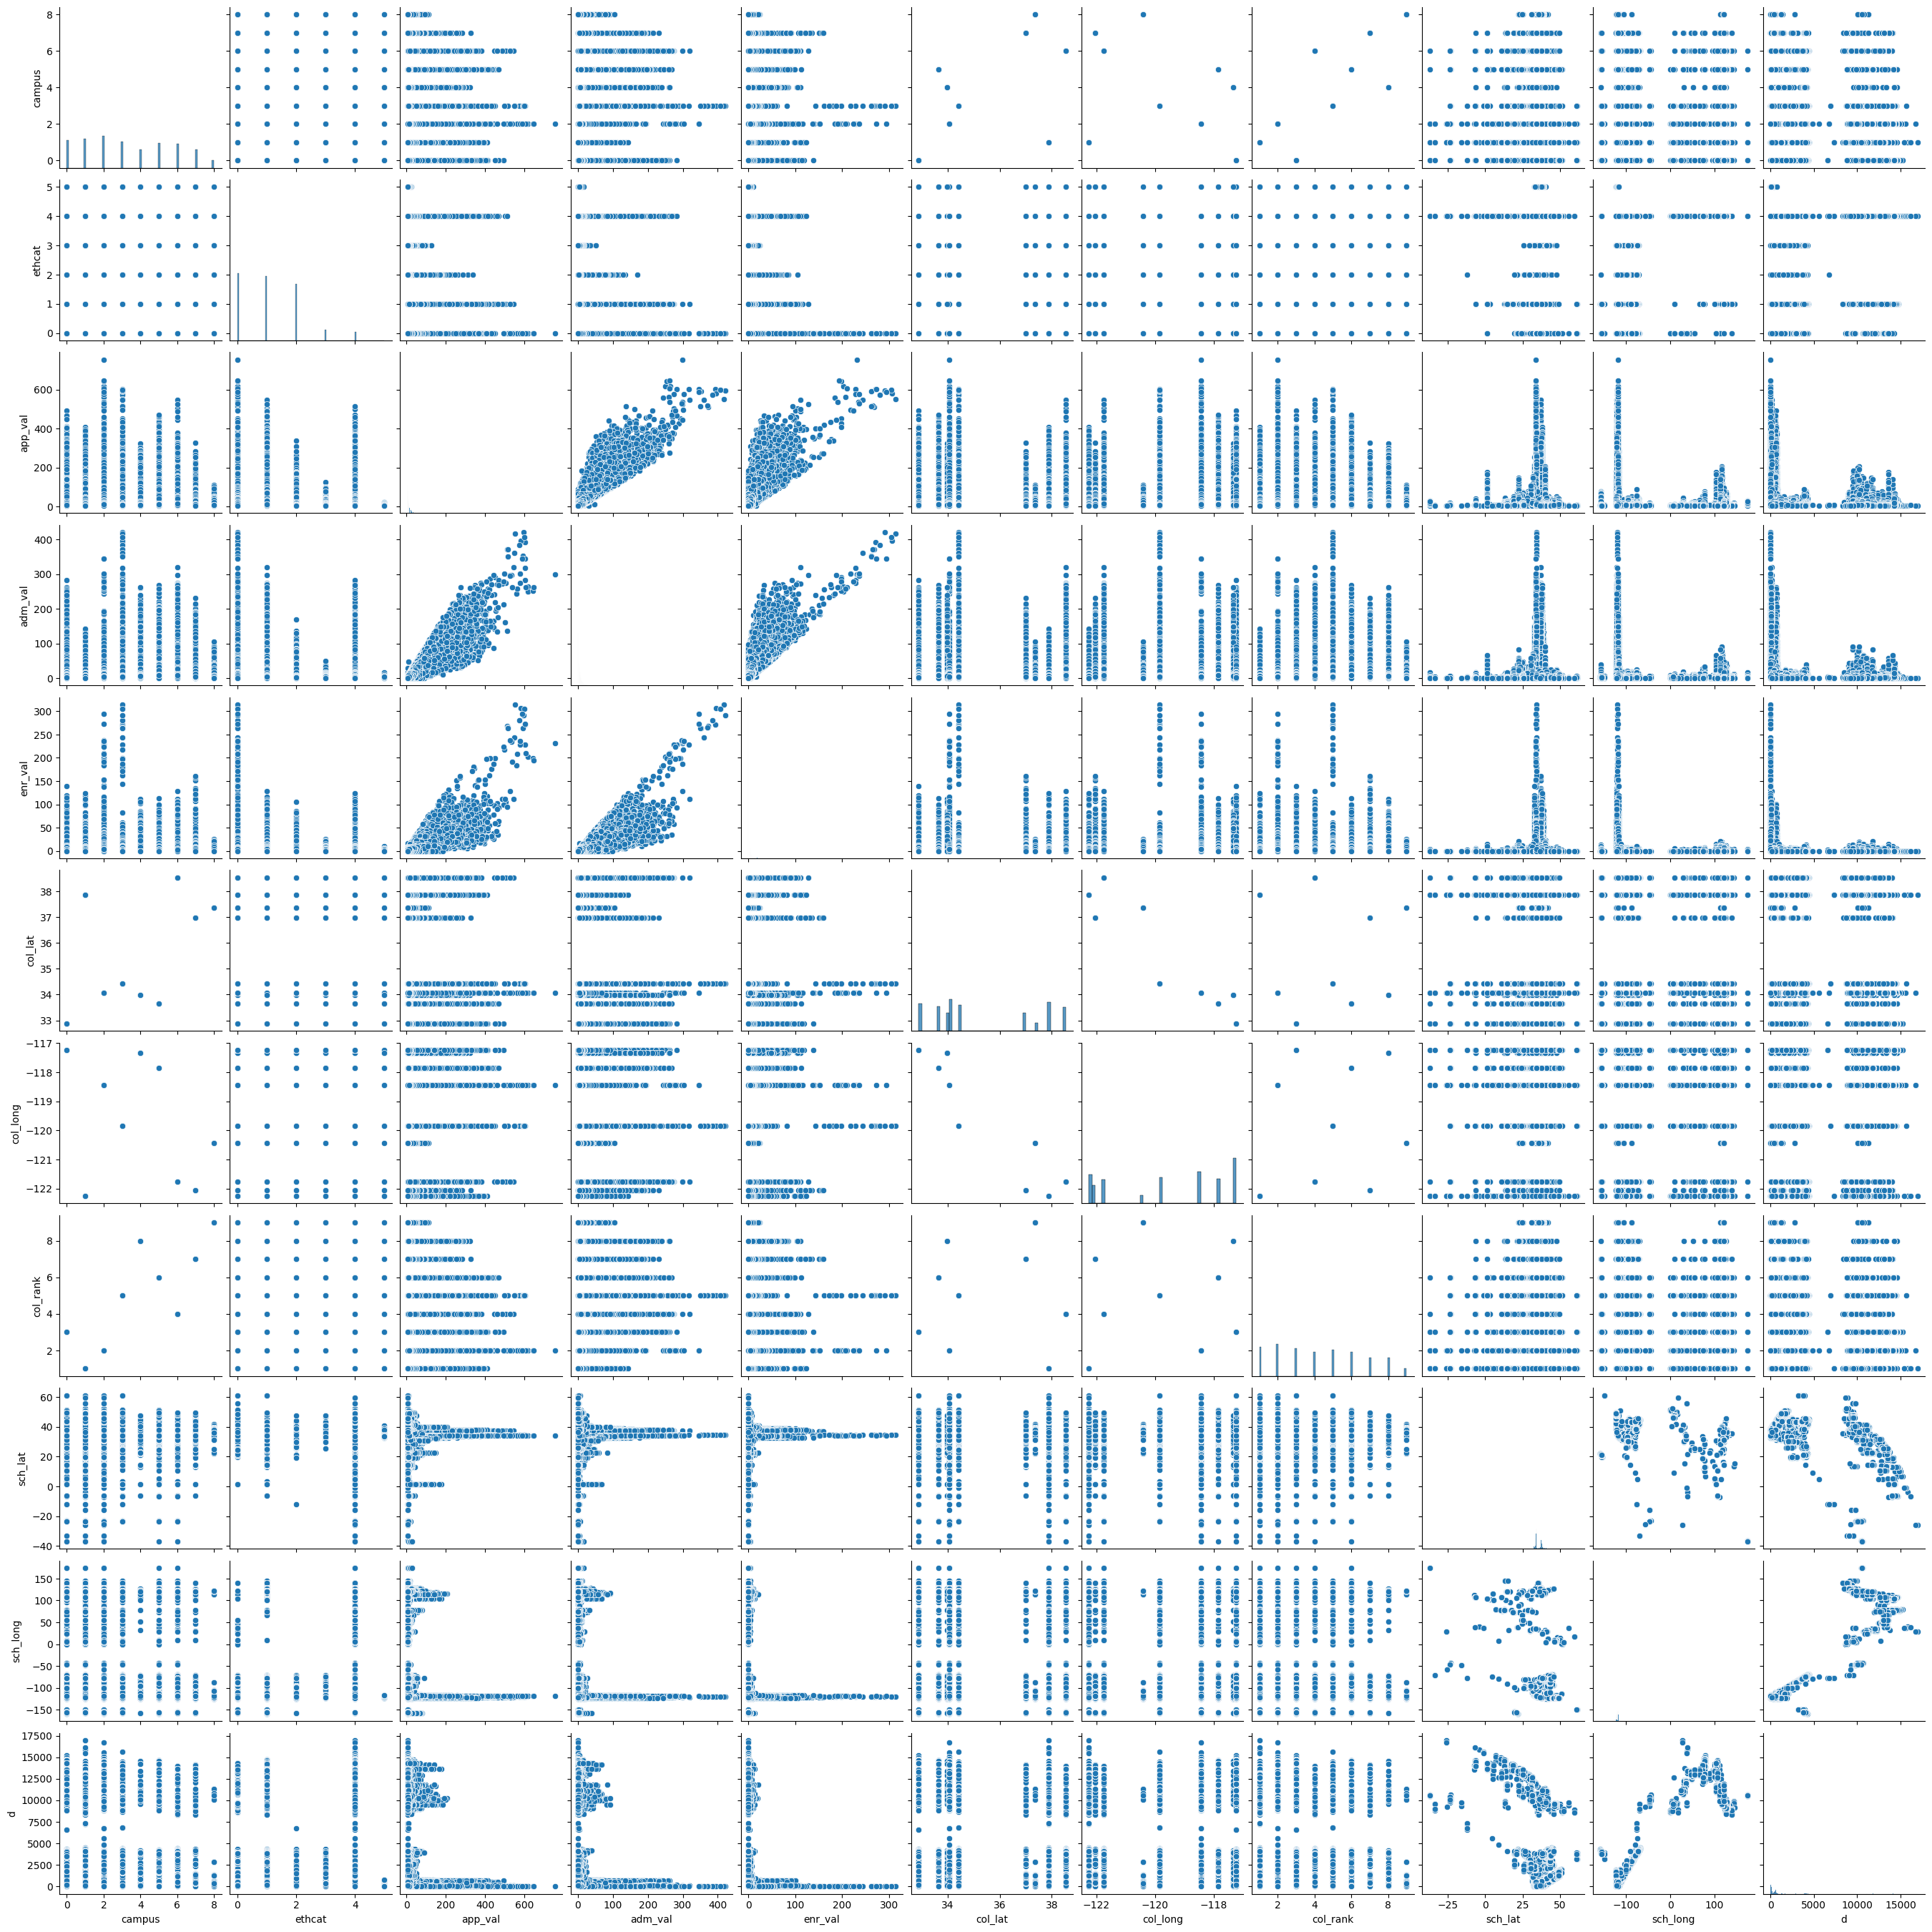

In [14]:
sb.pairplot(df)

In [15]:
df.head(100)

,campus,ethcat,app_val,adm_val,enr_val,col_lat,col_long,col_rank,sch_lat,sch_long,d
0,0,0,6,0,0,32.8801,-117.2340,3,32.829481,-117.127251,11.464280
1,1,1,10,0,0,37.8719,-122.2585,1,33.715600,-117.929238,605.606830
2,2,0,7,0,0,34.0689,-118.4452,2,33.715600,-117.929238,61.811813
3,3,1,12,6,0,34.4140,-119.8489,5,33.715600,-117.929238,193.361754
4,4,1,15,4,0,33.9737,-117.3281,8,33.715600,-117.929238,62.572713
...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,12,8,5,37.8719,-122.2585,1,33.795734,-117.766155,608.390121
96,6,0,20,10,4,38.5382,-121.7617,4,33.795734,-117.766155,638.371363
97,5,2,14,12,8,33.6405,-117.8443,6,33.795734,-117.766155,18.736253
98,5,0,36,30,17,33.6405,-117.8443,6,33.795734,-117.766155,18.736253


In [16]:
data_x = df.drop(['campus'], axis=1)
data_y = df.campus

In [17]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [18]:
decission_tree = tree.DecisionTreeClassifier()

In [19]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [20]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4) * 100.0}%')

Score: 100.0%
